![Title](cisco.png)

# Lab - Simple Linear Regression in Python 

## Part 1: Import the Libraries and Data

#### Step 1: Import the libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 2: Import the data.

In [3]:
# Import the file, stores-dist.csv
salesDist = pd.read_csv('./stores-dist.csv')

# Verify the imported data
salesDist.head()

,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [4]:
# Cambiamos el nombre annual net sales por sales, y number of stores in district por stores para 
# facilitar el procesamiento de datos
salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})
salesDist.head()

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


## Part 2: Plot the Data

### Step 1: Determine the correlation.

En este paso, investigará la conexión de los datos antes del análisis de regresión.

In [5]:
salesDist.corr(method='pearson')

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


Según el coeficiente de correlación, parece que la columna `district` tiene correlación baja con `sales` y `stores` La columna del distrito no es necesaria como parte del análisis de regresión, podemos descartarla.

In [6]:
sales = salesDist.drop(columns ='district')
sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


### Step 2: Create the plot.

In [8]:
# dependent variable for y axis (objeto)
y = sales['sales']
# independent variable for x axis (predictora)
x = sales.stores

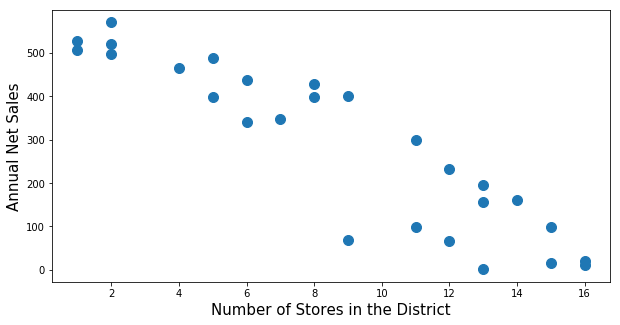

In [9]:
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(10,5))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 10)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 15)
plt.xlabel('Number of Stores in the District', fontsize = 15)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Display the scatter plot
plt.show()

## Part 3: Perform Simple Linear Regression

Utilizará numpy para generar una línea de regresión correspondiente a los datos analizados. Calculará el centroide correspondiente a este conjunto de datos (promedio del conjunto de datos). La línea de regresión lineal simple generada también debe atravesar el centroide

### Step 1: Calculate the slope and y-intercept of the linear regression line.

In [17]:
# Use numpy polyfit for linear regression to fit the data
# Generate the slope of the line (m)
# Generate the y-intercept (b)
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is y = {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is y = -35.79x + 599.38.


### Step 2: Calculate the centroid.

The centroid of the dataset is calculated by using the mean function.

In [18]:
# Calculamos el centroide usando la función mean
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 8.74 and y = 286.57.


### Step 3: Overlay the regression line and the centroid point on the plot.

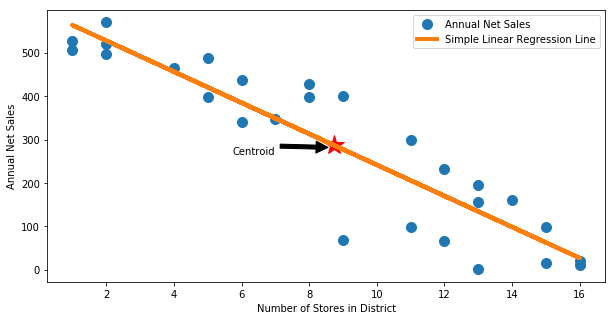

In [20]:
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(10,5))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 10, label = "Annual Net Sales") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 20, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Annual Net Sales', fontsize = 10)
plt.xlabel('Number of Stores in District', fontsize = 10)

# Enlarge x and y tick marks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 10)

# Create legend
plt.legend(loc = 'upper right', fontsize = 10)

### Step 4: Prediction

Using the linear regression line, you can predict the annual net sales based on the number of stores in the district.

In [33]:
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [42]:
# Enter the number of stores in the function to generate the net sales prediction.
predict(4)

456.2313681207653

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>